In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
import glob

In [91]:
fname = r'DEEPEND_Dataset_tunas.xlsx'

df = pd.read_excel(fname,na_values=-99999)

# Getting the data without NA
tunaLarvae = df['Th_NN500'].dropna()
idx = np.where(tunaLarvae != np.nan)
sal = df['Salinity'][idx[0][:]].fillna(method='ffill')

# Removing all data based on the idx of tunaLarvae and filling the NaN regions using previous values
# removing values where salinity is greater than 40 for all variables
lat = df['Latitude (DD)'][idx[0][:]].fillna( method ='ffill') 
lat = lat[sal < 40]
lon = df['Longitude (DD)'][idx[0][:]].fillna( method ='ffill') 
lon = lon[sal < 40]
date = df['Collection date'][idx[0][:]].fillna( method ='ffill') 
date = date[sal < 40]
sst = df['SST (°C)'][idx[0][:]].fillna( method ='ffill') 
sst = sst[sal < 40]
ssh = df['SSHA (cm)'][idx[0][:]].fillna( method ='ffill') 
ssh = ssh[sal < 40]
sal = sal[sal < 40]


tunaLarvae = tunaLarvae[sal < 40]
tuna = np.zeros((tunaLarvae.shape[0],1))
tuna[:,0] = tunaLarvae


# Creating a dict for my variables
list = {'lat':lat,'lon':lon,'date':date,'sst':sst,'ssh':ssh,'sal':sal,'tunaLarvae':tunaLarvae}

In [181]:
# Concatenating arrays
#X_b = np.zeros((lat.shape[0],7))
#for i in range(7):
#    X_b[:,i] = 

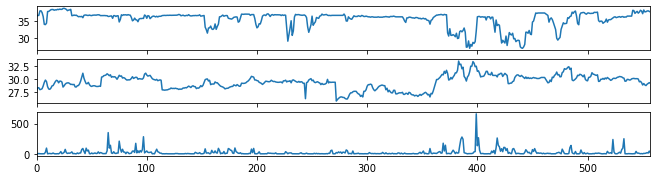

In [182]:
fig, (ax0, ax1, ax2) = plt.subplots(
    figsize=(11, 2.75),
    nrows=3,
    sharex=True,
)

sal.plot(ax=ax0)
sst.plot(ax=ax1)
tunaLarvae.plot(ax=ax2)

In [144]:
X_b = np.zeros((lat.shape[0],6))
X_b[:,0] = lat
X_b[:,1] = lon
X_b[:,2] = date
X_b[:,3] = sst
X_b[:,4] = ssh
X_b[:,5] = sal
#X_b[:,6] = tunaLarvae

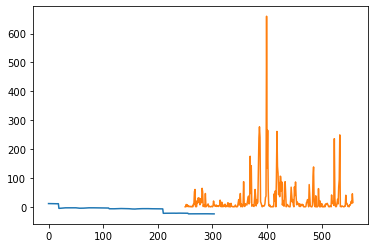

In [173]:
# Trying a simple linear regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_b[0:250,:],tunaLarvae[0:250])
lin_reg.intercept_, lin_reg.coef_

# Prediction
plt.plot(lin_reg.predict(X_b[250:,:]))
plt.plot(tunaLarvae[250:])

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.09352e-36): result may not be accurate.
  overwrite_a=True).T


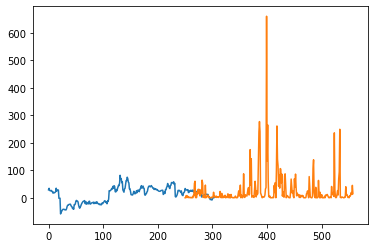

In [172]:
# Ridge Regression
from sklearn.linear_model import Ridge

x_b = np.array([np.concatenate((v,[1])) for v in X_b])

# Creating linear Regression object with a ridge coefficient of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(x_b[:250,:],tunaLarvae[:250])
plt.plot(ridge.predict(x_b[250:,:]))
plt.plot(tunaLarvae[250:])

/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/frame